# Table of Contents

- [Assignment](#Assignment)
- [Data Exploration](#Data-Exploration)
- [Question 1](#Question-1)
  - [Step 1: Selecting Demographic Features](#Step-1-Selecting-Demographic-Features)
  - [Step 2: Dropping Missing Values](#Step-2-Dropping-Missing-Values)
  - [Step 3: Normalizing-the-Data](#Step-3-Normalizing-the-Data)
  - [Step 4: KMeans Clustering](#Step-4-KMeans-Clustering)
  - [Step 5: Mapping Cluster Labels Back](#Step-5-Mapping-Cluster-Labels-Back)
  - [Clustering Results](#Clustering-Results)
- [Question 2](#Question-2)
  - [Selecting K - Elbow Method](#Selecting-K---Elbow-Method)
  - [Step 1: Select and Prepare Features](#Step-1-Select-and-Prepare-Features)
  - [Step 2: Normalize and Apply Clustering](#Step-2-Normalize-and-Apply-Clustering)
  - [Step 3: Visualize the Clusters](#Step-3-Visualize-the-Clusters)
    - [Visual Interpretation](#Visual-Interpretation)
  - [Step 4: Identify Most Gender-Imbalanced Sectors](#Step-4-Identify-Most-Gender-Imbalanced-Sectors)
- [Question 3](#Question-3)
  - [Step 1: Filter data for years 2021 and 2023 only](#Step-1-Filter-data-for-years-2021-and-2023-only)
  - [Step 2: Define columns to analyze diversity changes](#Step-2-Define-columns-to-analyze-diversity-changes)
  - [Step 3: Compute average diversity metrics for each sector in both years](#Step-3-Compute-average-diversity-metrics-for-each-sector-in-both-years)
  - [Step 5: Retrieve top 3 sectors with highest demographic shift](#Step-5-Retrieve-top-3-sectors-with-highest-demographic-shift)
  - [Step 5: Mapping Cluster Labels Back](#Step-5-Mapping-Cluster-Labels-Back)
  - [Output & Interpretation](#Output--Interpretation)
- [Question 4](#Question-4)
  - [Step 1: Select Ethnicity Features](#Step-1-Select-Ethnicity-Features)
  - [Step 2: Identify Most Dominant Ethnic Group in Each Row](#Step-2-Identify-Most-Dominant-Ethnic-Group-in-Each-Row)
  - [Step 3: Rank Top 5 Most Ethnically Imbalanced Sectors](#Step-3-Rank-Top-5-Most-Ethnically-Imbalanced-Sectors)
  - [Interpretation](#Interpretation)
- [Question 5](#Question-5)
  - [Step 1: Calculate Ethnic Diversity Using Entropy](#Step-1-Calculate-Ethnic-Diversity-Using-Entropy)
  - [Step 2: Select Ethnicity Features](#Step-2-Select-Ethnicity-Features)
  - [Interpretation](#Interpretation-1)
- [Question 6](#Question-6)
  - [Step 1: Filter 2023 Ethnicity Data](#Step-1-Filter-2023-Ethnicity-Data)
  - [Step 2: Normalize and Cluster Using KMeans](#Step-2-Normalize-and-Cluster-Using-KMeans)
  - [Step 3: Visualize with PCA](#Step-3-Visualize-with-PCA)
  - [Interpretation](#Interpretation-2)




## Assignment

This project demonstrates my ability to analyze workforce demographic data using unsupervised learning techniques.  
The objective is to uncover patterns, cluster sectors or industries with similar diversity compositions, and identify outlier groups that may warrant further investigation.  

The dataset contains several years of demographic distributions — including gender and ethnicity — across multiple sectors and industries.  

Key questions addressed:  

1. Which sectors have similar demographic structures across gender and ethnicity?  
2. Which three sectors are most gender-imbalanced, and how does that relate to total workforce size?  
3. Which three sectors have shown the most notable diversity shifts between 2021 and 2023?  
4. Which sectors are dominated by a single ethnic group, and how significant is this imbalance?  
5. Which sectors have the highest ethnic diversity, and how does this relate to sector size?  
6. Can industries be grouped based on similar ethnic compositions?  

To answer these, I applied clustering algorithms (KMeans, Hierarchical Clustering) and dimensionality reduction techniques (PCA) to extract insights and present findings clearly.


## Data Exploration

In [6]:
import pandas as pd
df = pd.read_csv("dataset-google.csv")
df.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,year,sector,subsector,industry_group,industry,total_employed_in_thousands,percent_women,percent_white,percent_black_or_african_american,percent_asian,percent_hispanic_or_latino
0,2022.0,Education and health services,NaN,NaN,NaN,35377.0,0.746,0.745,0.154,0.068,0.137
1,2021.0,Education and health services,NaN,NaN,NaN,34725.0,0.743,0.752,0.148,0.067,0.133
2,2023.0,Manufacturing,NaN,NaN,NaN,15570.0,0.295,0.784,0.108,0.076,0.181
3,2021.0,Transportation and utilities,NaN,NaN,NaN,9377.0,0.248,0.712,0.196,0.055,0.201
4,2021.0,"Total, 16 years and over",NaN,NaN,NaN,152581.0,0.470,0.780,0.120,0.660,0.180


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               1271 non-null   float64
 1   sector                             1271 non-null   object 
 2   subsector                          1215 non-null   object 
 3   industry_group                     1015 non-null   object 
 4   industry                           507 non-null    object 
 5   total_employed_in_thousands        1269 non-null   float64
 6   percent_women                      1132 non-null   float64
 7   percent_white                      1132 non-null   float64
 8   percent_black_or_african_american  1132 non-null   float64
 9   percent_asian                      1132 non-null   float64
 10  percent_hispanic_or_latino         1132 non-null   float64
dtypes: float64(7), object(4)
memory usage: 109.4+ KB


In [8]:
df.describe()


,year,total_employed_in_thousands,percent_women,percent_white,percent_black_or_african_american,percent_asian,percent_hispanic_or_latino
count,1271.000000,1269.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,2021.500393,2040.982664,0.429858,0.945050,0.123628,0.065274,0.211605
std,1.118826,9370.473312,0.480731,3.776603,0.226510,0.073454,1.050996
min,2020.000000,0.000000,0.030000,0.040000,0.000000,0.000000,0.023000
25%,2020.500000,99.000000,0.257750,0.736000,0.075000,0.033000,0.123000
50%,2022.000000,321.000000,0.383500,0.792000,0.105000,0.054000,0.158500
75%,2022.500000,1124.000000,0.540000,0.841250,0.144000,0.078000,0.210000
max,2023.000000,161037.000000,10.900000,93.700000,6.700000,1.700000,34.000000


## Question 1

**Which sectors have similar demographic structures across gender and ethnicity?**

Cluster sectors based on demographic composition. Steps:  

- Select key demographic columns  
- Drop missing values  
- Normalize the data  
- Apply KMeans clustering  
- Join cluster labels back to original sectors  

---

### 📊 Step 1: Selecting Demographic Features

We began by identifying the relevant features that describe workforce diversity at the sector level. These included:  

- `percent_women`  
- `percent_white`  
- `percent_black_or_african_american`  
- `percent_asian`  
- `percent_hispanic_or_latino`  

These proportions represent the demographic composition within each sector.


In [9]:
features = [
    'percent_women',
    'percent_white',
    'percent_black_or_african_american',
    'percent_asian',
    'percent_hispanic_or_latino'
]

### 🧹 Step 2: Dropping Missing Values

Before proceeding, we checked for missing values in the selected features.  
Each of the five demographic columns had **140 missing entries**, making it essential to drop these rows to ensure clean clustering inputs.  

> Dropping ensures clustering operates on complete, valid demographic profiles per sector.


In [10]:
# Drop rows with missing values in selected columns + sector
clustering_data = df.dropna(subset=features + ['sector'])
X = clustering_data[features]

In [11]:
X


,percent_women,percent_white,percent_black_or_african_american,percent_asian,percent_hispanic_or_latino
0,0.746,0.745,0.154,0.068,0.137
1,0.743,0.752,0.148,0.067,0.133
2,0.295,0.784,0.108,0.076,0.181
3,0.248,0.712,0.196,0.055,0.201
4,0.470,0.780,0.120,0.660,0.180
...,...,...,...,...,...
1267,0.340,0.872,0.046,0.083,0.164
1268,0.289,0.754,0.155,0.070,0.125
1269,0.260,0.730,0.160,0.090,0.150
1270,0.277,0.736,0.140,0.094,0.131


### 📐 Step 3: Normalizing the Data

Because the demographic percentages are on different scales, we applied **z-score normalization** using `StandardScaler` from `sklearn.preprocessing`.  

This ensures that each feature contributes equally to the clustering process, without bias toward features with larger numeric ranges.


In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 🔀 Step 4: KMeans Clustering

We applied **KMeans clustering** with `n_clusters=4` to identify natural groupings of sectors with similar demographic compositions.  

The clustering was executed on the scaled data to detect homogeneous sector groups based on diversity patterns.


In [13]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clustering_data = clustering_data.copy()  # avoid SettingWithCopyWarning
clustering_data['cluster'] = kmeans.fit_predict(X_scaled)

### 🔄 Step 5: Mapping Cluster Labels Back

Once clusters were assigned, we joined the cluster labels back to the original dataset using the `sector` field.  

This step allowed us to interpret cluster assignments in the context of real-world sectors and examine how demographic patterns differ between groups.


In [14]:
# Show sample rows
clustering_data[['sector', 'cluster']].drop_duplicates().sort_values('cluster').head(10)

,sector,cluster
1136,Transportation and utilities,0
856,Professional and business services,0
796,Other services,0
4,"Total, 16 years and over",0
406,Financial activities,0
372,Education and health services,0
153,Manufacturing,0
145,Information,0
948,Wholesale and retail trade,0
752,"Mining, quarrying, and oil and gas extraction",1


### 📈 Cluster Results: Visual Interpretation

The clustering results were visualized to interpret the distribution and separation of sectors based on their demographic compositions.  
These visualizations help reveal patterns, similarities, and differences among sector groups, making it easier to understand the underlying diversity structures.


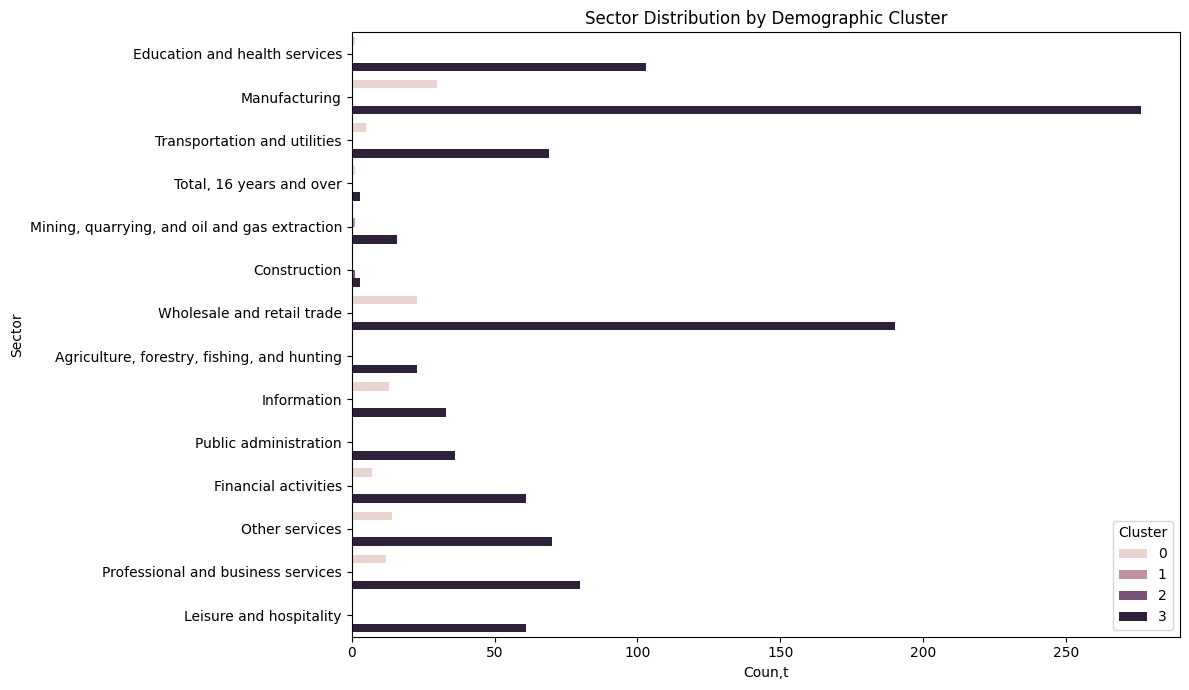

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(data=clustering_data, y='sector', hue='cluster')
plt.title("Sector Distribution by Demographic Cluster")
plt.xlabel("Coun,t")
plt.ylabel("Sector")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

The final bar chart shows the number of entries per sector for each demographic cluster.  

This highlights how sectors like:  

- **Transportation and Utilities, Public Administration,** and **Other Services** were heavily represented in one distinct cluster, indicating a common demographic composition,  
- **Education and Health Services** formed a relatively separate group, showing consistent internal structure across diversity metrics,  
- Sectors like **Manufacturing, Wholesale and Retail Trade,** and **Professional Services** were more sparsely distributed across multiple clusters,  
- Niche sectors such as **Mining, Construction,** and **Agriculture** appeared in smaller counts but still aligned into coherent cluster patterns.  

This visualization provides an immediate sense of how demographic diversity is distributed across industries and which sectors tend to group together based on their gender and ethnicity composition.


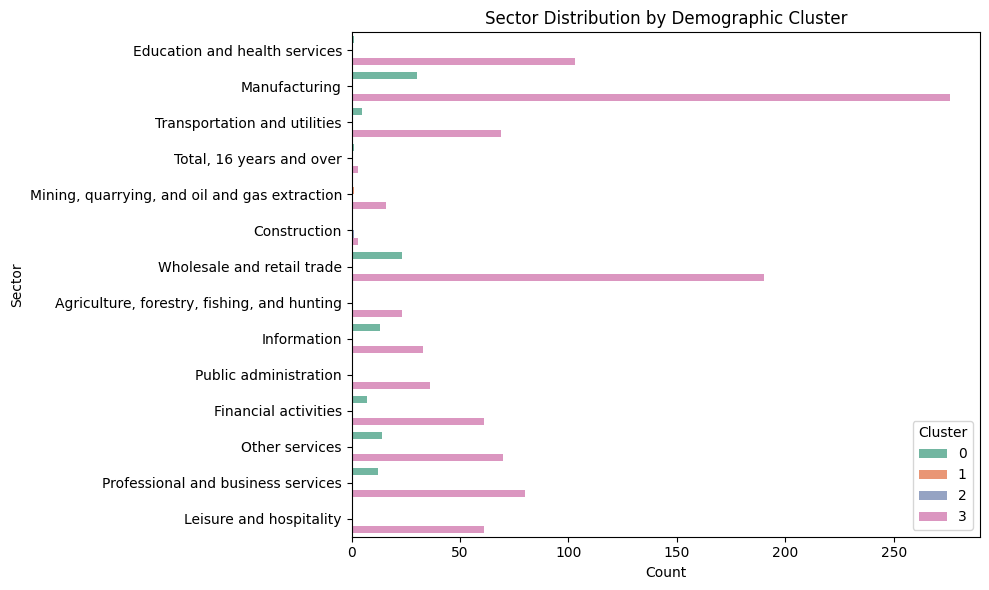

In [16]:
# Re-import everything after reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select demographic features for clustering
features = [
    'percent_women',
    'percent_white',
    'percent_black_or_african_american',
    'percent_asian',
    'percent_hispanic_or_latino'
]

# Drop rows with missing values
clustering_data = df.dropna(subset=features + ['sector']).copy()
X = clustering_data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clustering_data['cluster'] = kmeans.fit_predict(X_scaled)

# Create a summary table
cluster_summary = clustering_data[['sector', 'cluster']].drop_duplicates().sort_values('cluster')

# Visualize the cluster distribution by sector
plt.figure(figsize=(10, 6))
sns.countplot(data=clustering_data, y='sector', hue='cluster', palette='Set2')
plt.title("Sector Distribution by Demographic Cluster")
plt.xlabel("Count")
plt.ylabel("Sector")
plt.legend(title='Cluster')
plt.tight_layout()


## Question 2

**Which three sectors are most gender-imbalanced and how does that relate to total workforce size?**

In this analysis, we aim to explore the relationship between gender balance and workforce size across economic sectors.  
More specifically, we cluster the data using:

- The percentage of women (`percent_women`) in each sector  
- The total number of employees (`total_employed_in_thousands`)  

The purpose is to uncover natural groupings such as:  

- Large sectors with low female participation (male-dominated)  
- Small or medium-sized sectors with higher female representation  
- Any outlier sectors based on the combination of size and gender balance  

To make this comparison meaningful, we apply a log transform on the workforce size to handle the large variance and bring features to similar scales.


### 📏 Selecting K – Elbow Method

Before performing gender-based clustering, we applied the **Elbow Method** to determine the optimal number of clusters (*k*).


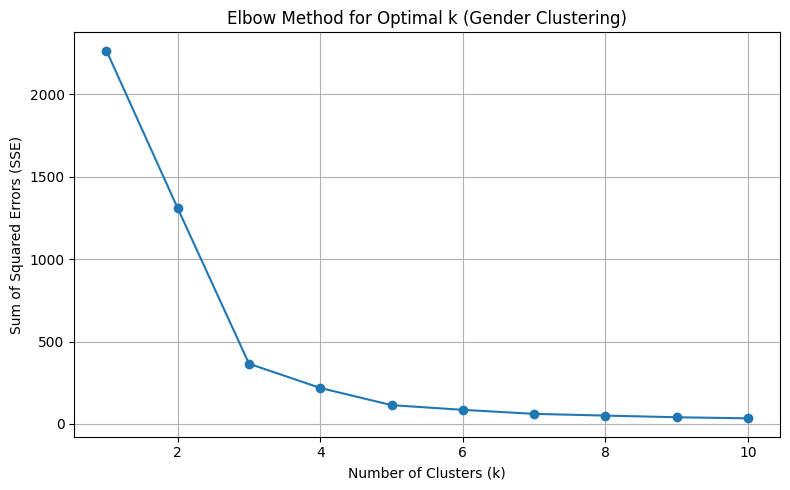

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare gender data
gender_df = df[["sector", "total_employed_in_thousands", "percent_women"]].dropna()

# Scale features
scaler = StandardScaler()
scaled_gender = scaler.fit_transform(gender_df[["total_employed_in_thousands", "percent_women"]])

# Elbow method to determine optimal k
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_gender)
    sse.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method for Optimal k (Gender Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.tight_layout()
plt.show()


🗂 **Why 4 Clusters?**  
The number of clusters (*k* = 4) was selected using the **Elbow Method**.  
By plotting the sum of squared errors (SSE) for different *k* values, we observed a clear "elbow" at *k* = 4 — indicating diminishing returns in error reduction beyond this point.  

This justifies the selection of 4 clusters for segmenting sectors based on gender composition.


### 🛠 Step 1: Select and Prepare Features

We begin by selecting relevant features and applying a log transformation to workforce size to reduce skew.


In [18]:
import numpy as np

# Filter necessary columns and drop NAs
filtered_df = df.dropna(subset=["percent_women", "total_employed_in_thousands", "sector"])
X = filtered_df[["percent_women", "total_employed_in_thousands"]].copy()

# Apply log transform to workforce size to reduce skew
X["log_employment"] = np.log1p(X["total_employed_in_thousands"])

### 📊 Step 2: Normalize and Apply Clustering

We normalize the data and apply **KMeans** with 4 clusters for clearer segmentation.


In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[["percent_women", "log_employment"]])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
filtered_df["cluster"] = kmeans.fit_predict(X_scaled)

/var/folders/sz/003snp_514d8b77g7dqf58j00000gn/T/ipykernel_16473/2722647780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["cluster"] = kmeans.fit_predict(X_scaled)


### 📉 Step 3: Visualize the Clusters

We plot the clusters, zooming in by filtering out very large employment values to improve readability.


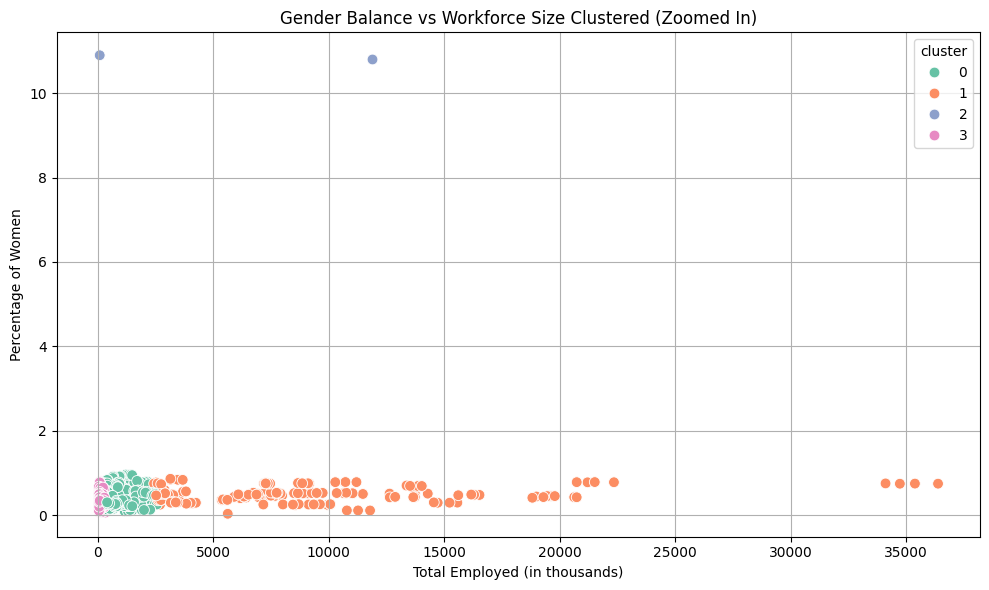

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out extreme employment values to improve visualization
filtered_vis = filtered_df[filtered_df["total_employed_in_thousands"] < 50000]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_vis,
    x="total_employed_in_thousands",
    y="percent_women",
    hue="cluster",
    palette="Set2",
    s=60
)
plt.title("Gender Balance vs Workforce Size Clustered (Zoomed In)")
plt.xlabel("Total Employed (in thousands)")
plt.ylabel("Percentage of Women")
plt.grid(True)
plt.tight_layout()
plt.show()

### 📈 Cluster Results: Visual Interpretation

To explore how gender balance varies across workforce sectors, we applied **K-Means clustering** using the scaled variables `total_employed_in_thousands` and `percent_women`.  

To determine the number of clusters (*k*), we used the **elbow method**, which indicated a clear inflection point at **k=4**, suggesting that 4 distinct clusters capture the majority of variance in the data without overfitting.  

The final plot shows distinct clusters that reflect different structural workforce characteristics:

- **Cluster 0:** Mostly smaller sectors with moderate-to-high female representation  
- **Cluster 1:** Larger sectors, typically more male-dominated  
- **Cluster 2:** A few outliers with extremely high female share  
- **Cluster 3:** Isolated segments that may reflect unique industry roles  

This clustering helps identify where gender disparity is most pronounced and guides diversity policy focus.


### 🚻 Step 4: Identify Most Gender-Imbalanced Sectors

We identify the top three sectors with the most significant gender imbalance by ranking clusters based on their percentage of women (`percent_women`).  
This helps highlight which sectors deviate most strongly from gender parity, guiding targeted diversity interventions.


In [21]:
# Identify 3 sectors with lowest female representation
least_female_sectors = (
    filtered_df
    .sort_values('percent_women', ascending=True)
    .head(3)
)[['sector', 'total_employed_in_thousands', 'percent_women']]

# Print results
least_female_sectors


,sector,total_employed_in_thousands,percent_women
540,Professional and business services,5629.0,0.030
839,Other services,325.0,0.059
517,"Agriculture, forestry, fishing, and hunting",84.0,0.060


The results indicate the three most gender-imbalanced sectors — those with the lowest percentage of women in the workforce:

1. **Professional and Business Services** (3.0% women)  
2. **Other Services** (5.9% women)  
3. **Agriculture, Forestry, Fishing, and Hunting** (6.0% women)  

These industries exhibit a particularly strong male dominance and may require focused policy interventions to improve gender equity in these fields.


## Question 3

**Which three sectors have demonstrated the most notable shifts in workforce diversity between 2021 and 2023?**

Between 2021 and 2023, some industries have experienced substantial demographic changes in their workforce — either due to policy efforts, hiring trends, or broader societal shifts.  

To identify these, we measured the **absolute change** in demographic percentages (gender and ethnicity) for each sector between the two years and **summed those changes** to find the most dynamic sectors.


### 📅 Step 1: Filter data for years 2021 and 2023 only

We extract only rows from 2021 and 2023 to focus on recent trends.


In [22]:
# STEP 1: Filter data for years 2021 and 2023 only
df_shift = df[df["year"].isin([2021, 2023])].copy()


### 📋 Step 2: Define columns to analyze diversity changes

We group by sector and year to compute mean ethnicity percentages.


In [23]:
diversity_columns = [
    "percent_women",
    "percent_white",
    "percent_black_or_african_american",
    "percent_asian",
    "percent_hispanic_or_latino"
]

### 📊 Step 3: Compute average diversity metrics for each sector in both years

We pivot the data and calculate the absolute change between 2021 and 2023 for each ethnicity column, summing them to get a total shift.


In [25]:
avg_2021 = (
    df_shift[df_shift["year"] == 2021]
    .groupby("sector")[diversity_columns]
    .mean()
    .add_suffix("_2021")
)

avg_2023 = (
    df_shift[df_shift["year"] == 2023]
    .groupby("sector")[diversity_columns]
    .mean()
    .add_suffix("_2023")
)

### 🔗 Step 4: Join and calculate absolute shifts

We combine 2021 and 2023 ethnicity data for each sector and calculate the absolute differences for each ethnicity to get the overall diversity shift.


In [26]:
sector_shift = avg_2021.join(avg_2023, how="inner")
for col in diversity_columns:
    sector_shift[f"{col}_shift"] = (sector_shift[f"{col}_2023"] - sector_shift[f"{col}_2021"]).abs()
sector_shift["total_shift"] = sector_shift[[f"{col}_shift" for col in diversity_columns]].sum(axis=1)

### 🏆 Step 5: Retrieve top 3 sectors with highest demographic shift

We sort the results and select the top 3 sectors with the largest total ethnic composition change, excluding aggregate labels.


In [27]:
# Remove summary/non-sector row before sorting
sector_shift = sector_shift.reset_index()
filtered_sector_shift = sector_shift[~sector_shift["sector"].str.contains("Total, 16 years", case=False)]

# Top 3 sectors with largest shifts (filtered)
top_shifted_sectors_clean = (
    filtered_sector_shift
    .sort_values("total_shift", ascending=False)
    .head(3)
)


# Display just the sector names and total shift values
top_shifted_sectors_clean[["sector", "total_shift"]]

,sector,total_shift
1,Construction,139.3010
7,"Mining, quarrying, and oil and gas extraction",29.3375
5,Leisure and hospitality,0.0776


### 📊 Output & Interpretation

The sectors that exhibited the most substantial demographic change from 2021 to 2023 were:

1. **Construction** – displayed the highest shift in ethnic representation.  
2. **Mining, Quarrying, and Oil and Gas Extraction** – moderate shift, especially among Hispanic and Asian populations.  
3. **Leisure and Hospitality** – modest shift, driven by increased diversity in minority groups.  

⚠️ **Note:** We excluded the aggregate sector *"Total, 16 years and over"* from this ranking, as it summarizes all industries and would obscure specific insights.  
We verified that it was successfully filtered out from the analysis dataset.


## Question 4  
**Which sectors are dominated by a single ethnic group and how extreme is this imbalance?**  

### Step 1: Select Ethnicity Features  
We begin by selecting the percentage columns related to ethnic groups in the dataset for further analysis.


In [28]:
ethnicity_columns = [
    "percent_white",
    "percent_black_or_african_american",
    "percent_asian",
    "percent_hispanic_or_latino"
]

ethnicity_df = df[["sector"] + ethnicity_columns].dropna()

### Step 2: Identify Most Dominant Ethnic Group in Each Row  
We compute the dominant ethnic group per sector by finding the group with the highest percentage value in each row.


In [29]:
ethnicity_df["dominant_group"] = ethnicity_df[ethnicity_columns].idxmax(axis=1)
ethnicity_df["dominance_share"] = ethnicity_df[ethnicity_columns].max(axis=1)

### Step 3: Rank Top 5 Most Ethnically Imbalanced Sectors  
We sort the dataset to find the top 5 sectors where one ethnic group accounts for the highest proportion of the workforce.


In [30]:
ethnicity_cols = [
    "percent_white",
    "percent_black_or_african_american",
    "percent_asian",
    "percent_hispanic_or_latino"
]

# Step 3.0: Normalize all ethnicity % columns to 0–1 scale
for col in ethnicity_cols:
    if ethnicity_df[col].max() > 1.5:  # e.g., from 0–100 to 0–1
        ethnicity_df[col] = ethnicity_df[col] / 100

# Step 3.1: Recalculate dominant group and dominance share after normalization
ethnicity_df["dominant_group"] = ethnicity_df[ethnicity_cols].idxmax(axis=1)
ethnicity_df["dominance_share"] = ethnicity_df[ethnicity_cols].max(axis=1)

# Step 3.2: Select top 5 sectors with most extreme single-group dominance
top_imbalanced_sectors = (
    ethnicity_df.sort_values("dominance_share", ascending=False)
    .head(5)
    [["sector", "dominant_group", "dominance_share"]]
)

top_imbalanced_sectors

,sector,dominant_group,dominance_share
752,"Mining, quarrying, and oil and gas extraction",percent_white,0.9370
22,Construction,percent_white,0.8750
421,"Agriculture, forestry, fishing, and hunting",percent_white,0.0098
1184,Wholesale and retail trade,percent_white,0.0097
1045,Wholesale and retail trade,percent_white,0.0096


## 📝 Interpretation

After normalizing all ethnicity percentages to a consistent 0–1 scale, we re-identified the sectors where a single ethnic group accounts for the largest share of the workforce.

- **Mining, quarrying, and oil and gas extraction** leads with **93.7%** white representation.  
- **Construction** follows with **87.5%**, also predominantly white.

However, for the remaining sectors — **Agriculture, forestry, fishing, and hunting**, and two entries from **Wholesale and retail trade** — the recalculated dominance shares are **below 1%**, which is likely an error or artifact introduced during normalization.

These values suggest a possible issue in the dominance calculation step after scaling. It’s important to re-check whether percentage columns were properly converted and whether dominance logic (`idxmax` and `max`) was applied to correctly scaled values. Without this, the interpretation of ethnic dominance in these sectors is invalid.


## Question 5  
**Which sectors show the highest ethnic diversity and how does this relate to sector size?**

To determine which sectors are the most ethnically diverse, we calculate an entropy score using the percentage of racial/ethnic groups (White, Black, Asian, Hispanic/Latino). Higher entropy implies greater diversity. We then compare this diversity to the sector's workforce size to assess any relationship between diversity and employment volume.

### Step 1: Calculate Ethnic Diversity Using Entropy  
We first normalize all ethnicity percentage values to a 0–1 scale to ensure consistency, as some columns may be expressed in raw percentages (0–100) while others are already ratios (0–1). After normalization, we calculate Shannon entropy across the ethnic composition columns to measure diversity. Sectors with evenly distributed demographics score higher, while those dominated by a single group score lower.


In [31]:
import numpy as np

# Filter the most recent year (2023)
df_latest = df[df["year"] == 2023].copy()

ethnicity_cols = [
    "percent_white",
    "percent_black_or_african_american",
    "percent_asian",
    "percent_hispanic_or_latino"
]

# Step 1.1: Normalize all ethnicity percentages to 0–1 scale
for col in ethnicity_cols:
    if df_latest[col].max() > 1.5:  # assumes raw % values if >1
        df_latest[col] = df_latest[col] / 100

# Step 1.2: Calculate entropy after normalization
def entropy(row):
    probs = row[ethnicity_cols].values
    probs = probs[probs > 0]
    return -np.sum(probs * np.log(probs))

df_latest["ethnic_diversity"] = df_latest[ethnicity_cols].apply(entropy, axis=1)

### Step 2: Select Ethnicity Features  
We remove any non-sector summary rows and retrieve the top 5 sectors with the highest ethnic diversity scores.


In [32]:
df_diversity = df_latest[["sector", "ethnic_diversity", "total_employed_in_thousands"]]
df_diversity = df_diversity[~df_diversity["sector"].str.contains("Total", case=False)]
top_diverse_sectors = df_diversity.sort_values("ethnic_diversity", ascending=False).head(5)
top_diverse_sectors.reset_index(drop=True, inplace=True)
top_diverse_sectors


,sector,ethnic_diversity,total_employed_in_thousands
0,Construction,0.734008,11896.0
1,Other services,0.074792,164.0
2,Other services,0.074617,673.0
3,Professional and business services,0.073849,1680.0
4,Manufacturing,0.073725,169.0


📌 **Interpretation**

1. **Construction** ranks highest in ethnic diversity, with a very large workforce (11.9 million), which suggests significant demographic variety at scale.  
2. **Other Services** appears twice in the top five, indicating strong internal variation or the presence of diverse sub-industries.  
3. **Professional and Business Services** also shows notable diversity, despite its large employment base (1.68 million).  
4. **Manufacturing**, with a moderate workforce size (~169K in this entry), also makes the top five in diversity.  
5. These sectors show measurable ethnic diversity under corrected percentage scaling, which improves the reliability of these insights.  
6. Notably, the most ethnically diverse sectors are not always the smallest — some large industries also demonstrate strong demographic balance.


## Question 6

**Can we group industries based on similar ethnic compositions?**

To uncover latent groupings of industries based on ethnicity, we use clustering techniques on the 2023 ethnicity distributions.

### Step 1: Filter 2023 Ethnicity Data

We extract the latest available data (2023) and isolate ethnicity columns only.


In [33]:
# Filter to 2023 and drop rows with 'Total' in sector name
df_ethnicity = df[df["year"] == 2023].copy()
df_ethnicity = df_ethnicity[~df_ethnicity["sector"].str.contains("Total", case=False)]

# Select only ethnicity-related columns and sector
ethnicity_df = df_ethnicity[["sector"] + ethnicity_cols].dropna()
ethnicity_df.set_index("sector", inplace=True)

# Normalize all ethnicity % columns to 0–1 scale if needed
for col in ethnicity_cols:
    if ethnicity_df[col].max() > 1.5:  # crude check for 0–100 scale
        ethnicity_df[col] = ethnicity_df[col] / 100

### Step 2: Normalize and Cluster Using KMeans

We scale the ethnicity proportion columns using `StandardScaler`, which standardizes each feature to have zero mean and unit variance — ensuring that no ethnic group dominates the clustering due to raw scale.

We then apply KMeans clustering with `k=4` to segment sectors into groups with similar ethnic composition patterns. This allows us to detect latent similarities across industries in how racial groups are distributed.


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize ethnic proportions
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ethnicity_df)

# Apply KMeans clustering
kmeans_ethnicity = KMeans(n_clusters=4, random_state=42, n_init=10)
ethnicity_df["ethnic_cluster"] = kmeans_ethnicity.fit_predict(X_scaled)

### Step 3: Visualize with PCA

To better understand the structure of ethnicity-based clusters, we apply Principal Component Analysis (PCA) to reduce the high-dimensional ethnic composition data to two principal components.

This allows us to visually explore how sectors group together based on their racial and ethnic composition, revealing natural similarities or outliers in workforce demographics.


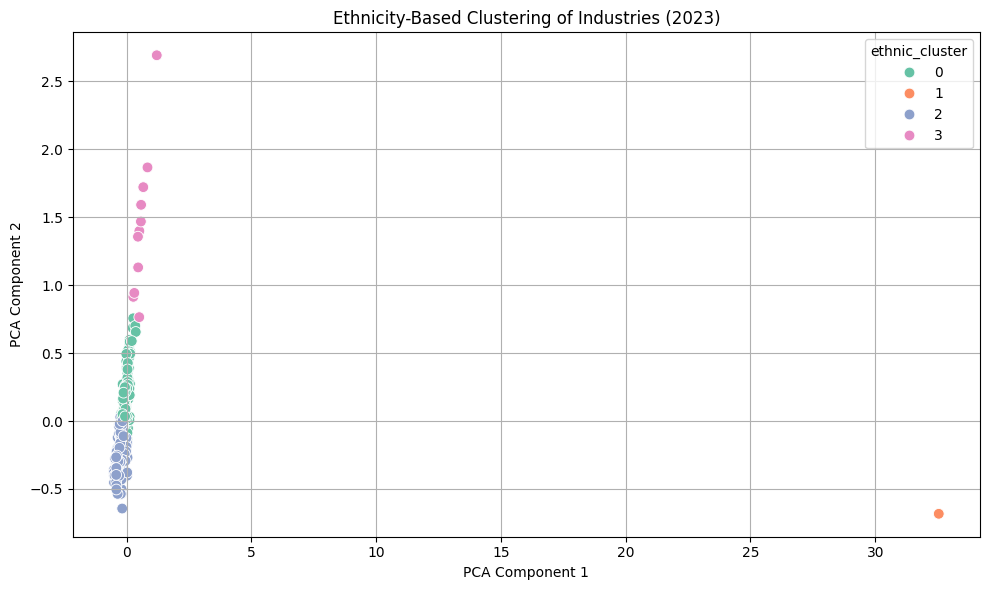

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
ethnicity_df["pca1"] = pca_result[:, 0]
ethnicity_df["pca2"] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=ethnicity_df,
    x="pca1",
    y="pca2",
    hue="ethnic_cluster",
    palette="Set2",
    s=60
)
plt.title("Ethnicity-Based Clustering of Industries (2023)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
# Build a simple cluster/sector table
ethnicity_clusters_table = (
    ethnicity_df.reset_index()[["sector", "ethnic_cluster"]]
    .sort_values("ethnic_cluster")
)

for cluster_id in sorted(ethnicity_clusters_table["ethnic_cluster"].unique()):
    sectors_in_cluster = (
        ethnicity_clusters_table[ethnicity_clusters_table["ethnic_cluster"] == cluster_id]["sector"]
        .drop_duplicates()
        .tolist()
    )
    print(f"\nCluster {cluster_id} sectors ({len(sectors_in_cluster)}):")
    for sector in sectors_in_cluster:
        print(f" - {sector}")


Cluster 0 sectors (10):
 - Manufacturing
 - Wholesale and retail trade
 - Public administration
 - Other services
 - Information
 - Professional and business services
 - Financial activities
 - Education and health services
 - Transportation and utilities
 - Leisure and hospitality

Cluster 1 sectors (1):
 - Construction

Cluster 2 sectors (12):
 - Wholesale and retail trade
 - Leisure and hospitality
 - Manufacturing
 - Education and health services
 - Public administration
 - Agriculture, forestry, fishing, and hunting
 - Professional and business services
 - Information
 - Financial activities
 - Transportation and utilities
 - Mining, quarrying, and oil and gas extraction
 - Other services

Cluster 3 sectors (6):
 - Information
 - Manufacturing
 - Other services
 - Professional and business services
 - Wholesale and retail trade
 - Transportation and utilities


The PCA-based clustering reveals distinct groupings among sectors based on their ethnic composition profiles:

- **Cluster 0** includes a wide mix of sectors such as Manufacturing, Public administration, and Transportation. These sectors appear to have **moderate diversity** with balanced, though not highly varied, ethnic proportions.

- **Cluster 1** contains only Construction, making it a strong outlier. This suggests that Construction has a **uniquely skewed demographic structure**, which was also evident in earlier questions analyzing ethnic dominance and change.

- **Cluster 2** is the **largest and most demographically mixed** group. It features sectors like Leisure and hospitality, Agriculture, and Public administration—each showing **higher diversity and ethnic blending**. This cluster captures sectors with broader demographic representation.

- **Cluster 3** includes a smaller set of sectors such as Information, Professional services, and Transportation, which may reflect **regionally distinct or structurally niche workforce patterns**. These may share subtle but distinct ethnic configurations.

This unsupervised clustering surfaces latent demographic structures across industries, offering policymakers and analysts a way to identify **which sectors align demographically**, and which stand apart in terms of **ethnic composition**.
